对于任何一家公司来讲，员工队伍的稳定性对于企业的发展都至关重要。之前马老师也说过，员工离职无非两个原因，其一是工资没有给到位，其二是员工干的不爽。所以员工离职预测的价值就愈发的凸显出来了，尤其对于HR部门，较早的预测可以帮助企业未雨绸缪，尽可能降低因为人员变动而给公司带来的损失。

本项目的目标：
- 读取员工离职数据集
- 初步的探索性分析
- 建立决策树模型
- 建立支持向量机模型
- 模型评估
- 项目总结

### 1.读取数据集

In [2]:
#导入数据分析的常用工具包

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()
%matplotlib inline

In [3]:
#读取数据集，按照自己的文件路径读取
df = pd.read_csv('D:\\Py_dataset\\HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
#查看数据集的基本信息
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
#查看该数据集的统计结果
df.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


* 平均工作满意度在61%左右
* 平均绩效在72%左右
* 平均参与项目的数量为3.8
* 平均每月工作时间为201小时
* 该公司员工平均工作年限为3.5年
* 2%的员工在过去5年内得到岗位上的晋升
* 该公司的离职率为24%

**数据特征解释说明**

|Keywords|Meanning|type|value range|
|-------|--------|----|-----|
|satisfaction_level|员工满意度|数值型|0~1|
|last_evalution|员工绩效|数值型|0~1|
|number_probject|参与的项目数量|数值型|2~1|
|average_monthly_hours|每月平均工作时间|数值型|96~310|
|time_spend_company|工作年限|数值型|2~10|
|work_accident|工作中是否出现差错|数值型|0和1|
|left|是否离职|数值型|0和1|
|promotion_last_5years|过去五年是否得到提升|数值型|0和1|
|department|部门|object|类别值|
|salary|薪资|object|类别值|

In [6]:
#查看数据集的大小
df.shape

(14999, 10)

In [7]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### 2.初步探索性分析

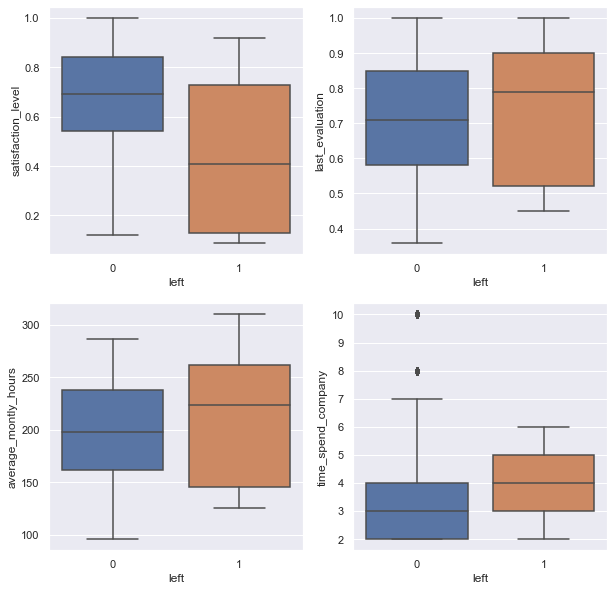

In [8]:
#绘制箱型图，观察不同特征与离职之间的关系

plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
sns.boxplot(x = 'left',y = 'satisfaction_level',data = df)


plt.subplot(2,2,2)
sns.boxplot(x = 'left',y = 'last_evaluation',data = df)

plt.subplot(2,2,3)
sns.boxplot(x = 'left',y = 'average_montly_hours',data = df)

plt.subplot(2,2,4)
sns.boxplot(x = 'left',y = 'time_spend_company',data = df)

* 离职员工的工作满意度在40%左右，未离职员工的工作满意度在70%左右。
* 离职员工的绩效评估较高，在0.8左右。
* 离职员工的工作时长较长，在225小时左右。
* 离职员工的工作年限在4年左右。

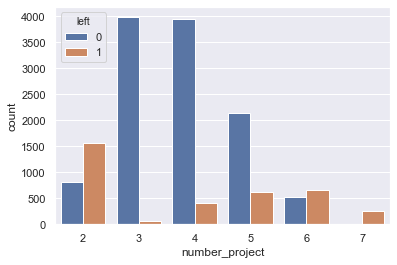

In [9]:
#观察离职与参与的项目的数量的关系
sns.countplot(x = 'number_project',hue = 'left',data = df)

### 3.建立决策树模型

In [10]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

In [11]:
# 对类别变量进行处理

df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [12]:
df['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [13]:
department_map = {'sales':0, 'accounting':1, 'hr':2, 'technical':3, 'support':4, 'management':5,
       'IT':6, 'product_mng':7, 'marketing':8, 'RandD':9}
salary_map = {'low':0, 'medium':1, 'high':2}

df['department'] = df['department'].map(department_map)
df['salary'] = df['salary'].map(salary_map)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,0,0
1,0.80,0.86,5,262,6,0,1,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0


对类别型变量最常用的处理方式是one_hot_encoding编码方式。上面我采用的是映射的方式，将每一个类别值都映射为一个单独的数字编码。但是这种做法也存在一个问题，将类别特征映射为1,2,3等数值，计算机会认为它们之间存在着相对的大小关系。所以推荐大家使用one_hot_encoding编码。

In [14]:
#切分训练集个测试集
label = df['left']
train = df.drop('left',axis = 1)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(train,label,test_size = 0.3,random_state = 0)

In [15]:
#导入决策树模型
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
tree.score(X_test,y_test)

0.9797777777777777

In [16]:
#测试集的预测结果
y_pred = tree.predict(X_test)

In [17]:
#打印出混淆矩阵值
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred,labels = [0,1])

array([[3398,   64],
       [  27, 1011]], dtype=int64)

In [18]:
df['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [20]:
#检查模型的各项评估指标
accuracy = (3394+1010)/(3394 + 68 + 28 +1010)
precision = 1010/(1010+28)
recall = 1010/(1010+68)
print(accuracy,precision,recall)

0.9786666666666667 0.9730250481695568 0.9369202226345084


- 从三种评估指标可以看出，该树模型的效果还可以。
- 直接使用classification_report方法更加的方便，可以直接打印出recall,precision,f1-score值等。

### 4.支持向量机SVM算法预测

In [21]:
from sklearn.svm import SVC

clf = SVC()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
confusion_matrix(y_test,y_pred,labels = [0,1])

C:\Users\taon1\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([[3344,  118],
       [ 105,  933]], dtype=int64)

In [22]:
svc_accuracy = (3344 + 933)/(3344 + 118 +105 + 933)
svc_recall = 933/(933+105)
svc_precision = 933/(933+118)

print(svc_accuracy,svc_recall,svc_precision)

0.9504444444444444 0.8988439306358381 0.8877259752616555


在SVC算法中，使用算法默认的参数，其recall值和精度都较低。将未离职的人预测为离职的有118人，将离职的预测为未离职的人又105人。

In [24]:
# 使用Gridsearch函数，对模型进行参数调优
import time
from sklearn.model_selection import GridSearchCV

clf = SVC()
param_grid = {'C':[0.01,0.1,1,10,100],'gamma':[0.001,0.01,0.1,1,10] }
grid = GridSearchCV(clf,param_grid = param_grid,cv = 3,n_jobs = -1,verbose = 2)
t1 = time.time()
grid.fit(X_train,y_train)
t2 = time.time()
print('The train time usage:{}'.format(round((t2-t1),3)))

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  2.8min finished


The train time usage:168.866


In [25]:
print(grid.best_score_)
print(grid.best_params_)

0.9587579769501857
{'C': 100, 'gamma': 0.01}


In [26]:
#采用最优的参数再次构建SVC模型

svc = SVC(C = 100,gamma = 0.01)
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)

In [27]:
confusion_matrix(y_test,y_pred,labels = [0,1])

array([[3374,   88],
       [  82,  956]], dtype=int64)

In [28]:
accuracy = (3374+956)/(3374 + 88 + 82 + 956)
recall = 956/(956+82)
precision = 979/(956+88)
print(accuracy,recall,precision)

0.9622222222222222 0.9210019267822736 0.9377394636015326


通过参数调整，SVC模型的预测准确度较原始模型有了较大的提升。

In [30]:
#展示决策树和支持向量机算法的预测结果

result = {'Decisiontree':[0.9786,0.9730,0.9369],'SVC':[0.9622,0.9210,0.9377]}
pd.DataFrame(result,index = ['accuracy','recall','precision'])

,Decisiontree,SVC
accuracy,0.9786,0.9622
recall,0.9730,0.9210
precision,0.9369,0.9377


### 5.项目总结

- 1.理解数据，理解数据集中每个特征的实际意义。
- 2.探索性分析，理解影响因素与最终结果之间的关系，做到心中有数。此处定性的分析，也只能表达其相关性。
- 3.建立决策树模型和支持向量机模型，其中支持向量机模型涉及到了参数优化。通过accuracy,recall,precision评估两个模型的效果。
- 4.通过对比两个模型的效果，最终选择决策树算法。原因有两点，决策树算法简单，计算效率高，可解释性非常好。